<a href="https://colab.research.google.com/github/saheelsatoskar/DataScienceInFinance/blob/main/Final_Assignment_Saheel_Satoskar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club Project**

### Project Overview

Lending Club is seeking the expertise of a data science consultant
to perform comprehensive data cleaning, exploratory data
analysis (EDA), and predictive modeling on their loan application
dataset. The project will also explore the potential for deploying
a real-time scoring application. The primary objective is to prepare
the dataset for accurate analysis and modeling, understand the
key variables influencing loan approval, and recommend a
predictive model for classifying loan applications.

#### User-specified parameters

In [ ]:
python_material_folder_name = "python-material"

#### Import libraries

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read & store the Data

In [ ]:
# Reading the data
df = pd.read_csv(f"{path_python_material}/data/1-raw/Loan_status_2007-2020Q3-100ksample.csv")

df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

In [ ]:
#Dropping not required columns
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace= True)
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,https:/

In [ ]:
#Checking the shape of the data
df.shape

(100000, 141)

In [ ]:
#To generate Descriptive Statistics
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99898.000000,100000.00000,100000.000000,100000.000000,100000.000000,47186.000000,14630.000000,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99994.000000,24602.000000,100000.0,7.166000e+03,7166.000000,100000.000000,97562.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,70356.000000,68227.000000,70356.000000,60315.000000,70356.000000,70356.000000,70356.000000,70343.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,98222.000000,97560.000000,97152.000000,97101.000000,99994.00000,100000.000000,94627.000000,97562.000000,97562.000000,97562.000000,98222.000000,97212.000000,21943.000000,87190.000000,31658.000000,97562.000000,97562.000000,97562.000000,97949.000000,97562.000000,97562.000000,97562.000000,97562.000000,97562.000000,97949.000000,94488.000000,97562.000000,97562.000000,97562.000000,97558.000000,97133.000000,99955.000000,99995.000000,9.756200e+04,9.822200e+04,98222.000000,9.756200e+04,6739.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6613.000000,6740.000000,6740.000000,6740.000000,6740.000000,4895.000000,6222.000000,4895.000000,4895.000000,6127.000000,6222.000000,6222.000000
mean,9.789485e+07,15332.373000,15328.216250,15313.244829,451.708510,8.002918e+04,19.332252,0.28473,700.639200,704.639440,0.554310,35.034269,74.945113,11.688690,0.17770,1.689349e+04,24.040390,4032.024853,4031.436341,12559.494957,12544.530188,9911.414064,2479.307829,1.750509,167.022522,28.605125,3512.909843,690.476220,677.660400,0.017651,44.633322,1.0,1.295764e+05,19.408330,0.003460,208.056907,1.459264e+05,0.928037,2.839175,0.703906,1.616351,20.323259,36927.159276,68.988842,1.250881,2.645076,5999.964339,56.154116,3.639794e+04,1.075232,1.517497,1.998707,4.512166,13757.234143,12779.260859,55.838138,0.00821,10.706750,125.750589,179.950237,14.462444,8.325342,1.507839,25.101726,39.344392,7.094151,36.186525,0.483631,3.702671,5.594074,4.858508,7.635350,8.558486,8.266138,13.785039,5.550563,11.699834,0.000445,0.002306,0.075306,2.080523,94.356537,4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), int64(1), object(34)
memory usage: 107.6+ MB


In [ ]:
# Missing values per column expressed as % of total number of values

missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_values.loc[missing_values > 0]

,0
emp_title,8.95
emp_length,6.95
title,0.78
dti,0.10
mths_since_last_delinq,52.81
mths_since_last_record,85.37
revol_util,0.08
last_pymnt_d,0.19
next_pymnt_d,63.57
collections_12_mths_ex_med,0.01


# **Observation**

There are multiple columns in dataframe with more than 90%+ missing values

In [ ]:
#Remove all the columns  which have more than 25% missing values.

columns_with_missing_values = list(missing_values[missing_values >= 25].index)

len(columns_with_missing_values)

49

# **Observation**:

There are 49 columns in dataframe with more than 25%+ missing values.
Hence drooping these columns from further analysis.
These columns clearly add noise.


In [ ]:
#Dropping the columns with more than 25% missing values
df = df.drop(columns_with_missing_values,axis=1)

#The shape of the dataframe after the columns are dropped
df.shape

(100000, 92)

##Next steps
Now that we have 92 column left for further analysis, lets deep dive further

In [ ]:
#Checking for columns with missing values
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_values[missing_values != 0]

,0
emp_title,8.95
emp_length,6.95
title,0.78
dti,0.10
revol_util,0.08
last_pymnt_d,0.19
collections_12_mths_ex_med,0.01
tot_coll_amt,2.44
tot_cur_bal,2.44
total_rev_hi_lim,2.44


### We are selecting few columns from list of 92 columns to understand the unique values under it.


In [ ]:
print("unique emp_title : %d"  % len(df.emp_title.unique()))
print("unique emp_length : %d"  % len(df.emp_length.unique()))
print("unique title : %d"  % len(df.title.unique()))
print("unique revol_util : %d"  % len(df.revol_util.unique()))
print("unique last_pymnt_d : %d"  % len(df.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(df.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(df.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(df.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(df.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(df.tax_liens.unique()))

unique emp_title : 40095
unique emp_length : 12
unique title : 3456
unique revol_util : 1089
unique last_pymnt_d : 148
unique last_credit_pull_d : 138
unique collections_12_mths_ex_med : 8
unique chargeoff_within_12_mths : 7
unique pub_rec_bankruptcies : 9
unique tax_liens : 18


## Deep-Dive into columns to understand the unique values & frequency

In [ ]:
df.emp_length.unique()

array(['10+ years', '6 years', nan, '2 years', '4 years', '7 years',
       '9 years', '5 years', '1 year', '8 years', '< 1 year', '3 years'],
      dtype=object)

In [ ]:
df.emp_length.value_counts()

,count
emp_length,
10+ years,32207
< 1 year,9306
2 years,9014
3 years,7862
1 year,6714
5 years,6158
4 years,6009
6 years,4496
7 years,4051


In [ ]:
df.collections_12_mths_ex_med.unique()

array([ 1.,  0.,  2.,  4.,  3., nan,  7.,  5.])

In [ ]:
df.collections_12_mths_ex_med.value_counts()

,count
collections_12_mths_ex_med,
0.0,98360
1.0,1529
2.0,89
3.0,10
4.0,4
7.0,1
5.0,1


In [ ]:
df.pub_rec_bankruptcies.unique()

array([ 1.,  0., nan,  2.,  3.,  6.,  4.,  5.,  7.])

In [ ]:
df.pub_rec_bankruptcies.value_counts()

,count
pub_rec_bankruptcies,
0.0,88268
1.0,11206
2.0,372
3.0,81
4.0,13
5.0,10
6.0,4
7.0,1


In [ ]:
df.tax_liens.unique()

array([ 0.,  1.,  2.,  6.,  3.,  4.,  5.,  7., 10.,  8., 12., nan, 15.,
       27., 24., 18., 52.,  9.])

In [ ]:
df.tax_liens.value_counts()

,count
tax_liens,
0.0,97787
1.0,1506
2.0,379
3.0,167
4.0,78
5.0,32
6.0,19
8.0,9
7.0,5


## **Observations:**
The columns 'collections_12_mths_ex_med', 'chargeoff_within_12_mths' & 'tax_liens' has more than 97%+ values which are either '0' or 'nan(no entry/blank)'

Hence the range of values that these categorical columns can take is not of any significant impact to the analysis.

We have decided to drop these columns for analysis.

In [ ]:
#Dropping the 3 insignificant columns
drop_column_list = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
df = df.drop(drop_column_list,axis=1)

In [ ]:
#Shape of the dataframe after dropping columns
df.shape

(100000, 89)

## Observations:

The column 'pub_rec_bankruptcies' have a range of values from [0,1,2,....,7]. 88268 records with 0 record of bankruptcies & 11206 records having one bankruptcies case and 481 records with remaining 6 bankrupcies case.

While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [ ]:
df=df[~df.pub_rec_bankruptcies.isnull()]

In [ ]:
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_values[missing_values != 0]

,0
emp_title,8.96
emp_length,6.95
title,0.78
dti,0.10
revol_util,0.08
last_pymnt_d,0.19
tot_coll_amt,2.39
tot_cur_bal,2.39
total_rev_hi_lim,2.39
acc_open_past_24mths,1.73


In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,May-2020,669.0,665.0,1.0,Individual,0.0,3832.0,259024.0,2400.0,1.0,64756.0,NaN,NaN,0.0,179.0,75.0,38.0,16.0,2.0,NaN,16.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,395328.0,11948.0,0.0,17928.0,N,N
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,May-2020,704.0,700.0,1.0,Individual,0.0,0.0,61815.0,35200.0,4.0,6182.0,7741.0,40.5,0.0,145.0,137.0,7.0,7.0,0.0,7.0,24.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,88154.0,61815.0,13000.0,52954.0,N,N
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,347xx,FL,7.22,0.0,Apr-2010,665.0,669.0,0.0,7.0,1.0,6001.0,52.6%,9.0,f,0.00,0.00,5846.672836,5846.67,5000.00,846.67,0.0,0.0,0.0,Jan-2018,162.43,May-2020,789.0,785.0,1.0,Individual,0.0,0.0,159131.0,11400.0,4.0,22733.0,4521.0,54.8,0.0,57.0,57.0,14.0,9.0,1.0,14.0,1.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,171118.0,13124.0,10000.0,7526.0,N,N
3,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,B4,NaN,NaN,MORTGAGE,43500.0,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,443xx,OH,24.55,0.0,Oct-2005,750.0,754.0,0.0,15.0,0.0,6573.0,12.1%,23.0,w,16317.69,16317.69,12000.930000,12000.93,7682.31,4318.62,0.0,0.0,0.0,May-2020,522.42,May-2020,749.0,745.0,1.0,Individual,0.0,0.0,104590.0,54500.0,4.0,6973.0,43140.0,12.0,0.0,37.0,132.0,1.0,1.0,2.0,1.0,3.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,0.0,0.0,0.0,2.0,95.7,0.0,0.0,202606.0,18520.0,49000.0,20000.0,N,N
4,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,C2,Shipping Clerk,10+ years,MORTGAGE,48000.0,Source Verified,Jan-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,681xx,NE,24.30,0.0,Apr-2008,735.0,739.0,1.0,16.0,0.0,11894.0,27.1%,23.0,w,0.00,0.00,16605.680000,16605.68,14000.00,2605.68,0.0,0.0,0.0,Jul-2019,11128.82,

In [ ]:
#Dropping'emp_title' as it hass 8.96% of missing values

drop_column_list = ['emp_title']
df = df.drop(drop_column_list,axis=1)

In [ ]:
df.shape

(99955, 88)

In [ ]:
#Checking for missing values
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_values[missing_values != 0]

,0
emp_length,6.95
title,0.78
dti,0.10
revol_util,0.08
last_pymnt_d,0.19
tot_coll_amt,2.39
tot_cur_bal,2.39
total_rev_hi_lim,2.39
acc_open_past_24mths,1.73
avg_cur_bal,2.40


#Observations:
columns emp_length 6.95% missing value.
Remove the rows with nan/blank values for these varaibles.

In [ ]:
df=df[~df.emp_length.isnull()]

In [ ]:
df.shape

(93005, 88)

In [ ]:
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_values[missing_values != 0]

,0
title,0.73
dti,0.01
revol_util,0.08
last_pymnt_d,0.18
tot_coll_amt,2.51
tot_cur_bal,2.51
total_rev_hi_lim,2.51
acc_open_past_24mths,1.82
avg_cur_bal,2.51
bc_open_to_buy,2.84


#Null value rows removals

In [ ]:
df=df[~df.title.isnull()]
df=df[~df.revol_util.isnull()]
df=df[~df.last_pymnt_d.isnull()]

In [ ]:
df.shape

(92089, 88)

In [ ]:
#Finding missing values in columns
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_values[missing_values != 0]

,0
dti,0.01
tot_coll_amt,2.53
tot_cur_bal,2.53
total_rev_hi_lim,2.53
acc_open_past_24mths,1.83
avg_cur_bal,2.53
bc_open_to_buy,2.78
bc_util,2.83
mo_sin_old_il_acct,5.10
mo_sin_old_rev_tl_op,2.53


#Null value rows removals

In [ ]:
df=df[~df.dti.isnull()]
df=df[~df.tot_coll_amt.isnull()]
df=df[~df.tot_cur_bal.isnull()]

df=df[~df.total_rev_hi_lim.isnull()]
df=df[~df.acc_open_past_24mths.isnull()]
df=df[~df.avg_cur_bal.isnull()]

df=df[~df.bc_open_to_buy.isnull()]
df=df[~df.bc_util.isnull()]
df=df[~df.mo_sin_old_il_acct.isnull()]

In [ ]:
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_values[missing_values != 0]

,0
mths_since_recent_inq,10.52
num_tl_120dpd_2m,3.18
percent_bc_gt_75,0.02
hardship_flag,1.30


In [ ]:
df.shape

(86486, 88)

In [ ]:
df=df[~df.mths_since_recent_inq.isnull()]

In [ ]:
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_values[missing_values != 0]

,0
num_tl_120dpd_2m,3.49
percent_bc_gt_75,0.02
hardship_flag,1.31


In [ ]:
df.shape

(77388, 88)

In [ ]:
df=df[~df.num_tl_120dpd_2m.isnull()]
df=df[~df.percent_bc_gt_75.isnull()]
df=df[~df.hardship_flag.isnull()]

In [ ]:
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_values[missing_values != 0]

,0


In [ ]:
df.shape

(73718, 88)

# Observations
There are no missing values in the datset. There are total 73718 loan records with 88 attributes/features


Further shortlist and narrow down the columns for analysis
Hence analysing all the columns in more details

In [ ]:
df.nunique().sort_values()

,0
pymnt_plan,1
policy_code,1
initial_list_status,2
term,2
application_type,2
debt_settlement_flag,2
hardship_flag,2
verification_status,3
num_tl_120dpd_2m,3
num_tl_30dpd,4


# **Observations:**
There are few columns having a all unique values. These cannot add much value to the analysis.

We will drop them from future analysis

In [ ]:
columns_to_be_dropped = ['id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt']
df= df.drop(columns_to_be_dropped,axis=1)

In [ ]:
df.shape

(73718, 77)

In [ ]:
df.nunique().sort_values()

,0
term,2
debt_settlement_flag,2
hardship_flag,2
verification_status,3
num_tl_120dpd_2m,3
num_tl_30dpd,4
home_ownership,6
grade,7
inq_last_6mths,7
loan_status,8


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
1,24000.0,60 months,9.16%,500.07,B,B2,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,credit_card,Credit card refinancing,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,10.0,0.0,22697.0,64.5%,24.0,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.00,0.00,0.000,May-2020,500.07,May-2020,704.0,700.0,0.0,61815.0,35200.0,4.0,6182.0,7741.0,40.5,145.0,137.0,7.0,7.0,0.0,7.0,24.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,88154.0,61815.0,13000.0,52954.0,N,N
2,5000.0,36 months,10.49%,162.49,B,B3,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,FL,7.22,0.0,Apr-2010,665.0,669.0,0.0,7.0,1.0,6001.0,52.6%,9.0,0.00,0.00,5846.672836,5846.67,5000.00,846.67,0.00,0.00,0.000,Jan-2018,162.43,May-2020,789.0,785.0,0.0,159131.0,11400.0,4.0,22733.0,4521.0,54.8,57.0,57.0,14.0,9.0,1.0,14.0,1.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,171118.0,13124.0,10000.0,7526.0,N,N
4,14000.0,60 months,13.59%,322.79,C,C2,10+ years,MORTGAGE,48000.0,Source Verified,Jan-2018,Fully Paid,debt_consolidation,Debt consolidation,NE,24.30,0.0,Apr-2008,735.0,739.0,1.0,16.0,0.0,11894.0,27.1%,23.0,0.00,0.00,16605.680000,16605.68,14000.00,2605.68,0.00,0.00,0.000,Jul-2019,11128.82,Feb-2020,779.0,775.0,0.0,90253.0,43900.0,5.0,5641.0,17318.0,39.9,72.0,117.0,6.0,6.0,2.0,6.0,5.0,0.0,4.0,5.0,5.0,6.0,5.0,13.0,16.0,5.0,16.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,152081.0,34847.0,28800.0,38181.0,N,N
5,4000.0,36 months,11.49%,131.89,B,B5,10+ years,RENT,46000.0,Verified,Nov-2015,Charged Off,moving,Moving and relocation,CA,11.56,0.0,Jul-2004,700.0,704.0,0.0,4.0,1.0,3556.0,38.7%,7.0,0.00,0.00,3930.310000,3930.31,3111.33,694.33,0.00,124.65,22.437,Apr-2018,131.89,Oct-2018,504.0,500.0,0.0,16847.0,9200.0,1.0,4212.0,4381.0,43.1,136.0,125.0,13.0,13.0,0.0,13.0,13.0,0.0,2.0,3.0,2.0,4.0,2.0,3.0,5.0,3.0,4.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0,28077.0,16847.0,7700.0,18877.0,N,N
7,19500.0,36 months,17.27%,697.86,D,D2,2 years,RENT,99000.0,Not Verified,Mar-2016,Fully Paid,debt_consolidation,Debt consolidation,TX,16.12,0.0,Jun-1995,665.0,669.0,1.0,6.0,0.0,3959.0,82.5%,19.0,0.00,0.00,25051.898291,25051.90,19500.00,5517.01,34.89,0.00,0.000,Oct-2018,4755.10,Dec-2018,709.0,705.0,0.0,72077.0,4800.0,4.0,12013.0,841.0,82.5,115.0,249.0,30.0,5.0,2.0,30.0,5.0,0.0,2.0,2.0,2.0,4.0,11.0,2.0,6.0,2.0,6.0,0.0,0.0,0.0,2.0,84.2,100.0,0.0,77361.0,72077.0,4800.0,72561.0,N,N


In [ ]:
df.total_pymnt= round(df.total_pymnt,2)
df.total_rec_late_fee= round(df.total_rec_late_fee,2)
df.collection_recovery_fee= round(df.collection_recovery_fee,2)

In [ ]:
#Deepdive into date-time type of columns
datetime_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
df[datetime_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 73718 entries, 1 to 99998
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             73718 non-null  object
 1   earliest_cr_line    73718 non-null  object
 2   last_pymnt_d        73718 non-null  object
 3   last_credit_pull_d  73716 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [ ]:
#Converting the dtype of these columns to datetime from Object
from datetime import datetime

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%Y')

In [ ]:
df[datetime_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 73718 entries, 1 to 99998
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             73718 non-null  datetime64[ns]
 1   earliest_cr_line    73718 non-null  datetime64[ns]
 2   last_pymnt_d        73718 non-null  datetime64[ns]
 3   last_credit_pull_d  73716 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 2.8 MB


# **Features**

Analysing each of the features in more details to get further insights

# 1. home_ownership

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,37970
RENT,27953
OWN,7704
ANY,86
OTHER,3
NONE,2


In [ ]:
df.loc[df['home_ownership'].isin(['ANY', 'NONE']), 'home_ownership'] = 'OTHER'

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,37970
RENT,27953
OWN,7704
OTHER,91


# 2. grade and sub_grade

In [ ]:
df['grade'].value_counts()

,count
grade,
B,21334
C,20503
A,16254
D,10632
E,3620
F,1053
G,322


In [ ]:
df['sub_grade'].value_counts()

,count
sub_grade,
B4,4568
B5,4566
C1,4524
B2,4124
B1,4048
C3,4046
C2,4034
B3,4028
A5,3983


# 3. term

In [ ]:
df['term'].value_counts()

,count
term,
36 months,51047
60 months,22671


# 4. 'installment_ratio'


In [ ]:
df['installment_ratio']= df['installment'] / df['loan_amnt']
df[['installment_ratio','loan_amnt', 'term']].head(5)

,installment_ratio,loan_amnt,term
1,0.020836,24000.0,60 months
2,0.032498,5000.0,36 months
4,0.023056,14000.0,60 months
5,0.032972,4000.0,36 months
7,0.035788,19500.0,36 months


# 5. 'purpose'

In [ ]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,41272
credit_card,17665
home_improvement,5059
other,4319
major_purchase,1621
medical,803
small_business,762
car,688
house,515


# Visualisations for features

# Loan Status

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,38104
Current,26176
Charged Off,8940
Late (31-120 days),272
In Grace Period,156
Late (16-30 days),48
Issued,15
Default,7


Focusing the analysis only for 'Fully Paid','Charged Off'

In [ ]:
df= df[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df.shape

(47044, 78)

In [ ]:
# For warnings
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,38104
Charged Off,8940


In [ ]:
print("Fully Paid:",df['loan_status'].value_counts()[0]/len(df['loan_status'])*100)
print("Charged Off:",df['loan_status'].value_counts()[1]/len(df['loan_status'])*100)

Fully Paid: 80.9965139018791
Charged Off: 19.00348609812091


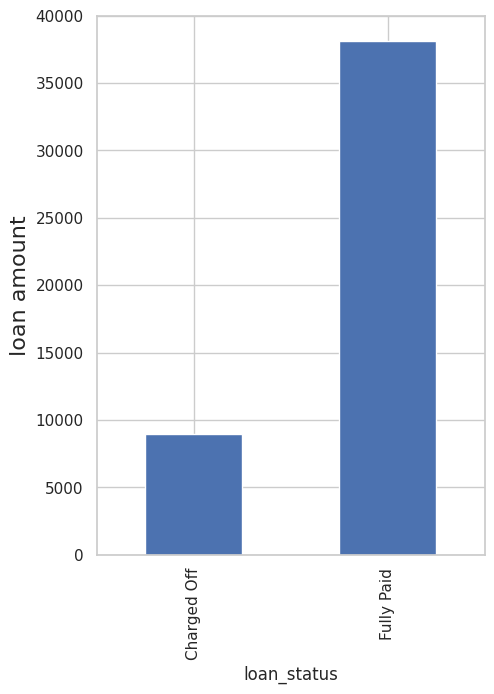

In [ ]:
plt.figure(figsize=(5,7))
ax = df.groupby('loan_status').loan_amnt.count().plot.bar()
ax.set_ylabel('loan amount', fontsize=16)
plt.show()

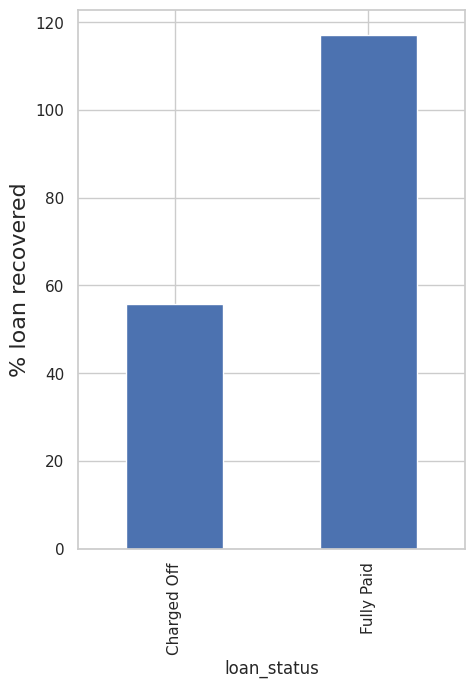

In [ ]:
plt.figure(figsize=(5,7))
ax = (df.groupby('loan_status').total_pymnt.sum() * 100 / df.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.show()

target variable - Loan Status

In [ ]:
df['loan_default'] = df.loan_status == "Charged Off"
df['loan_default'].value_counts()

,count
loan_default,
False,38104
True,8940


# Observations:
Lending Club recovers 57-58%% of the loan amount when loans are defaulted.
On fully paid up loans, the company makes 17-18% profit.

# loan_amnt

In [ ]:
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

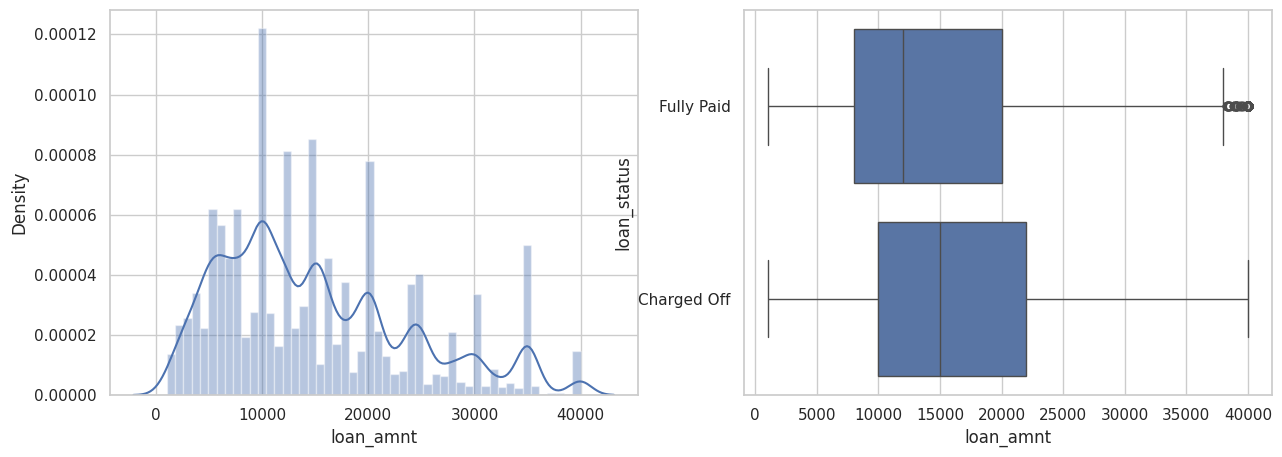

In [ ]:
plot_distribution(df, 'loan_amnt')

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,8940.0,16361.935123,9094.287602,1000.0,10000.0,15000.0,22000.0,40000.0
Fully Paid,38104.0,14596.335030,8974.854147,1000.0,8000.0,12000.0,20000.0,40000.0


Obervations¶
Overall, the loan amount distribution is slightly right-skewed with mean greater than the median.
Most of the loans granted are below 20000 (0.75 percentile value)
Charged off loans are shifted towards higher average loan amount request.

In [ ]:
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'],
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


In [ ]:
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax
    plt.show()

<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

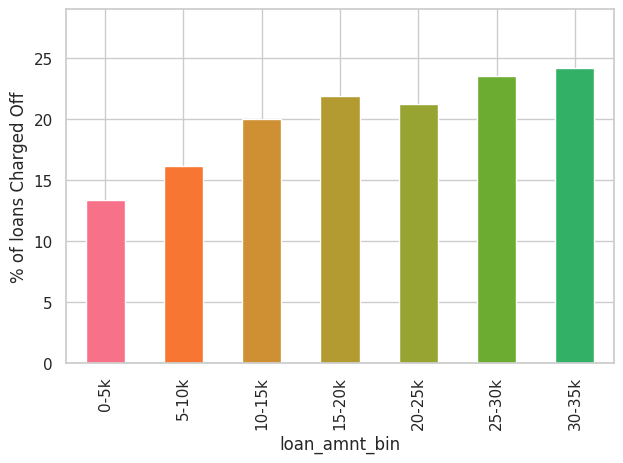

In [ ]:
plotLoanStatus(df, 'loan_amnt_bin')

Obervations¶
The % of charged-off loans increases as we go up the loan amount buckets.
The higher loans carry a higher risk of default.

In [ ]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        ax.set_ylabel('loan amount', fontsize=16)
    plt.tight_layout()

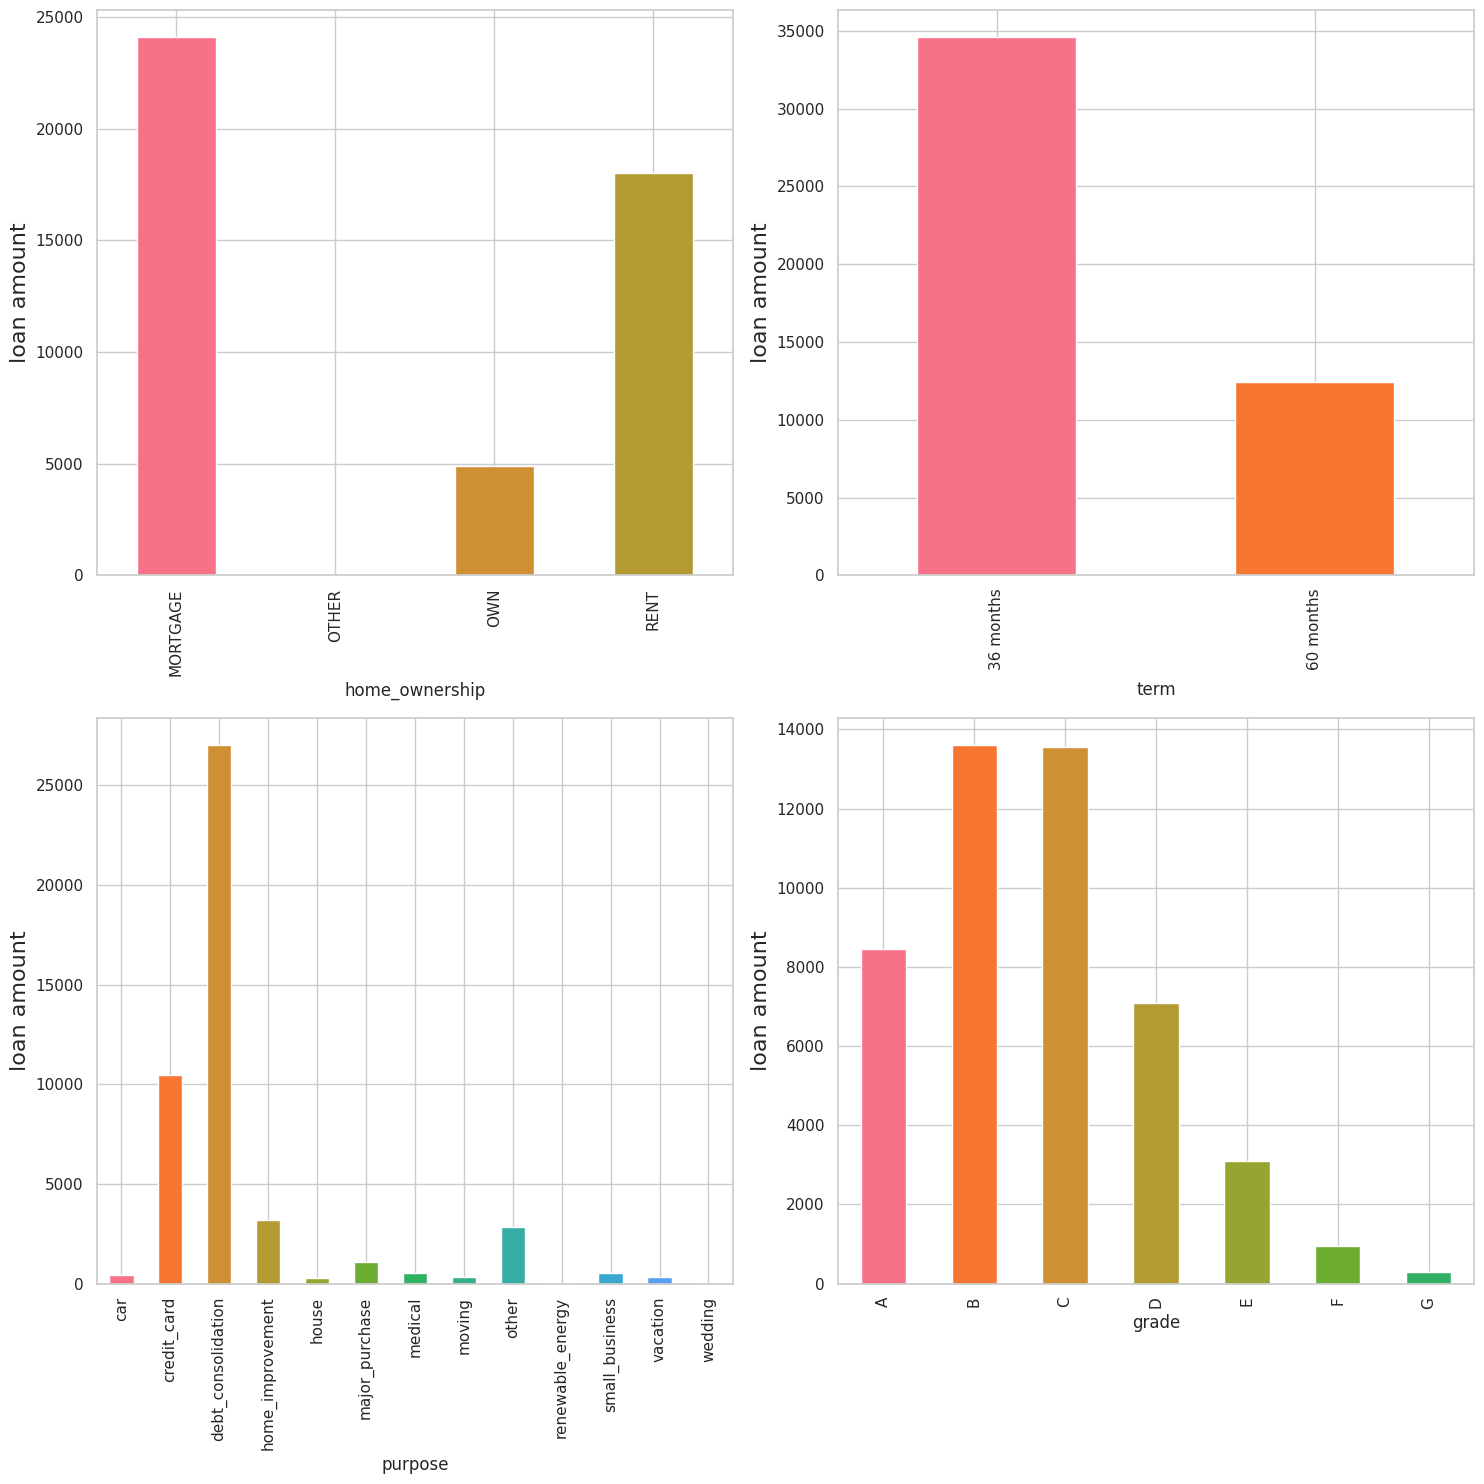

In [ ]:
plt.figure(figsize=(15,15))

categoricalBarPlots(df,['home_ownership', 'term', 'purpose', 'grade'])

Obervations
Most loans are for 36 month term
debt_consolidation is by far the largest 'purpose' for seeking a loan
Most approved loans are high grade ( A & B)

# term

In [ ]:
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (df[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)

    plt.subplot(1, 2, 2)
    values = (df.loc[df['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)

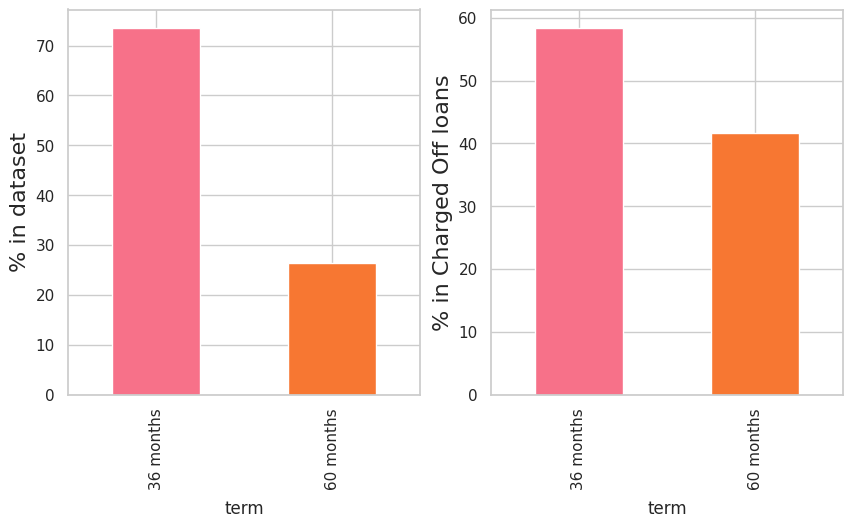

In [ ]:
plt.figure(figsize=(10,5))
plot_percentages(df, 'term')

Observation:
Around 75% of the total loans are given for duration of 36 months term. while just 25% of the loans are those given for 60 months term.

Charged-Off loans, percentage of term 60 months rises to 40%.

## Purpose

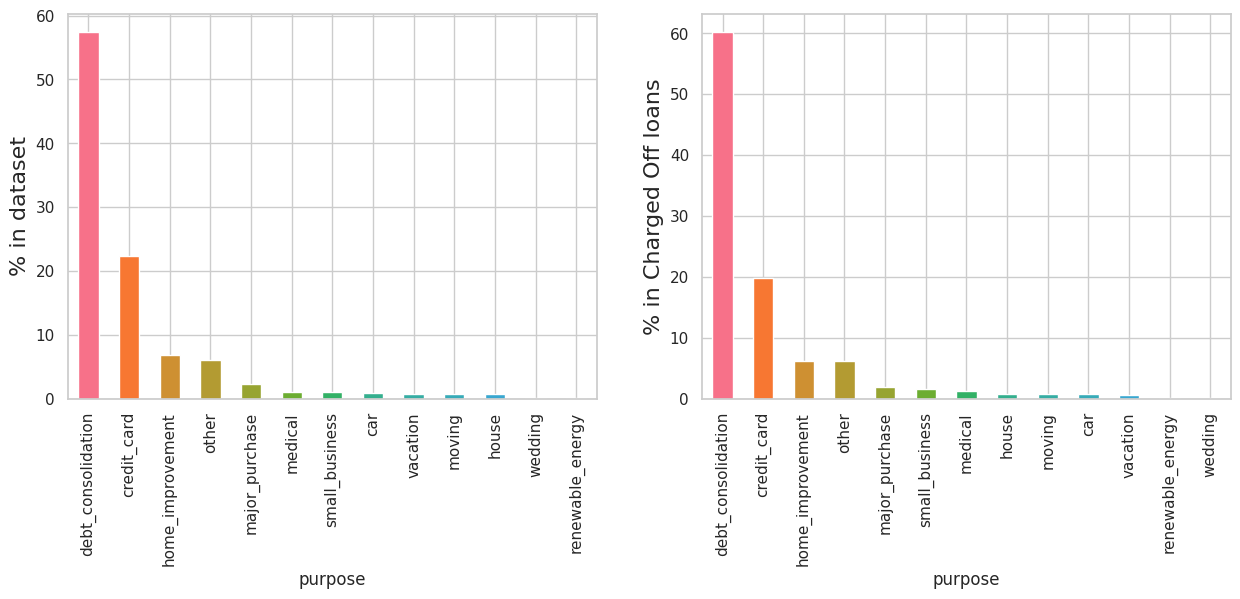

In [ ]:
plt.figure(figsize=(15,5))
plot_percentages(df, 'purpose')

<Axes: xlabel='purpose', ylabel='% of loans Charged Off'>

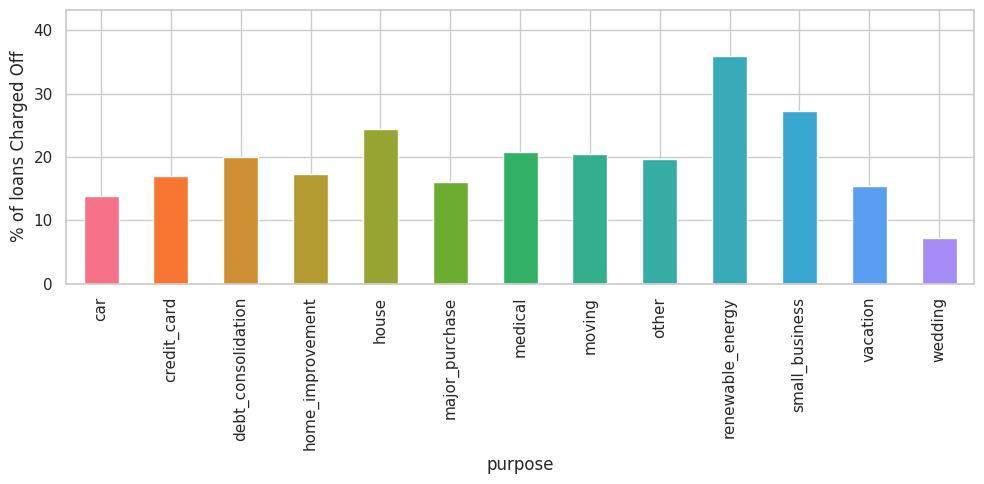

In [ ]:
plt.figure(figsize=(10, 5))
plotLoanStatus(df, 'purpose')

bservation:¶
The category 'debt_consolidation' has the 60% of Charged Off loans.

# grade and sub_grade

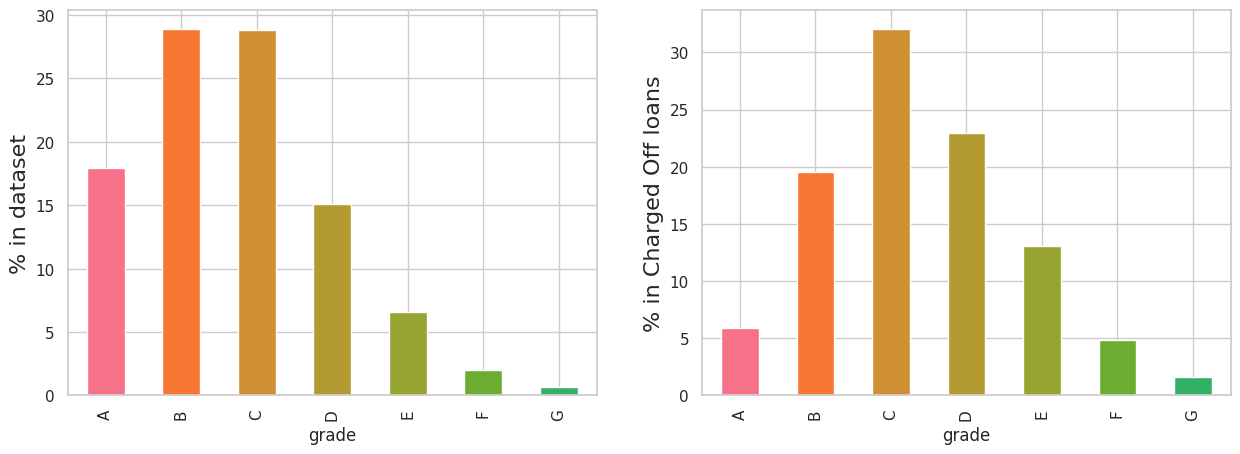

In [ ]:
plt.figure(figsize=(15,5))
plot_percentages(df, 'grade', True)

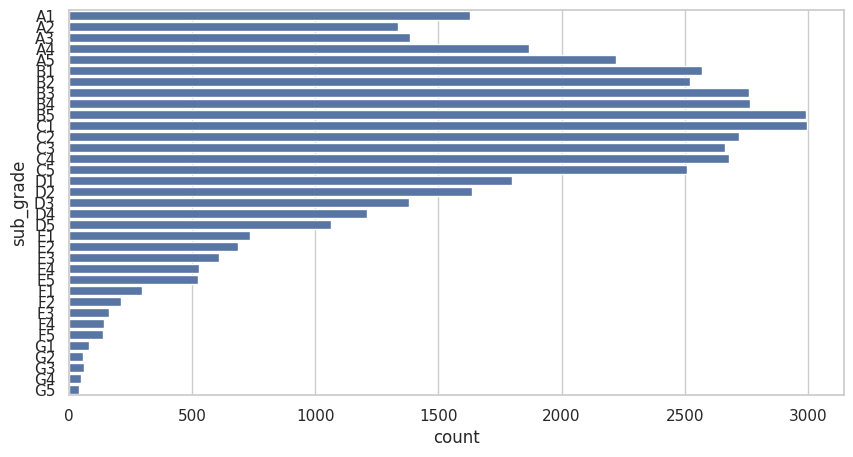

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['sub_grade'], order=sorted(df.sub_grade.unique()))
plt.show()

Observation:¶
Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
Grade D, E, F, G loans are less safe.

# emp_length


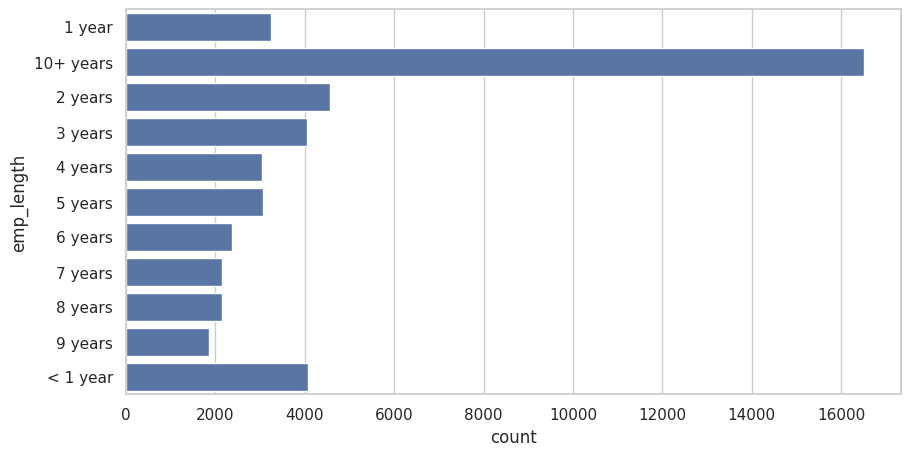

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['emp_length'], order=sorted(df.emp_length.unique()))
plt.show()

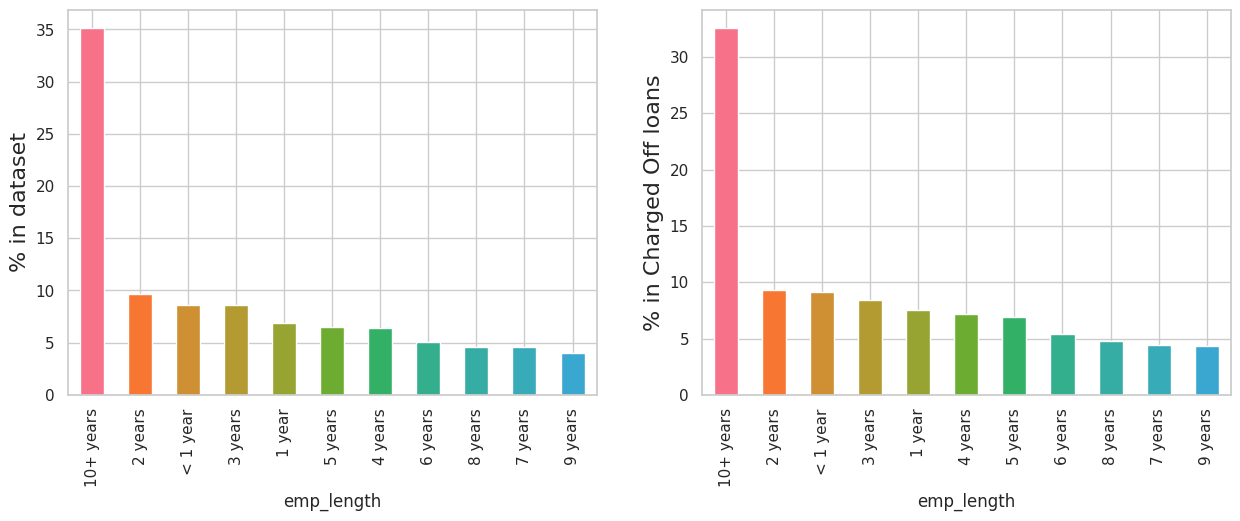

In [ ]:
plt.figure(figsize=(15, 5))
plot_percentages(df, 'emp_length')

# Observation:

1. 35% of the of loan taker have an employment length of more than 10 years.
2. There is no impact of employment length to chance of loan default.

# home_ownership

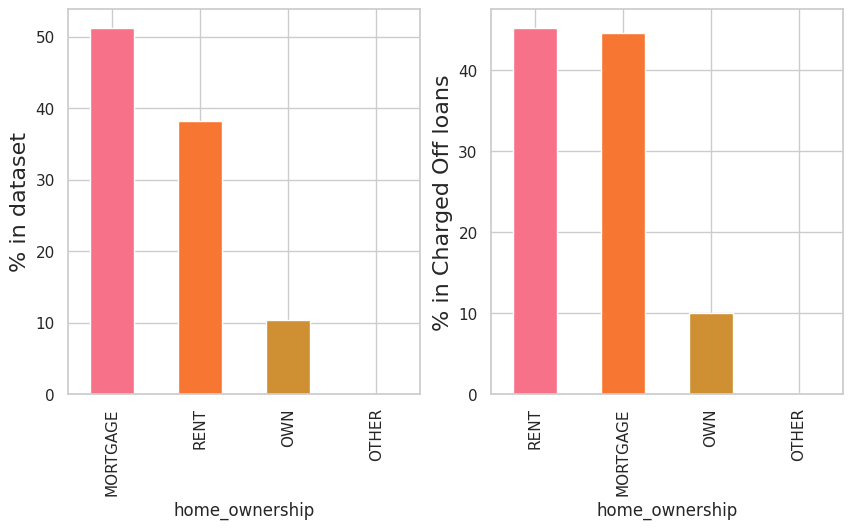

In [ ]:
plt.figure(figsize=(10,5))
plot_percentages(df, 'home_ownership')

# Observation:

There is no impact of home_ownership to propensity to default on loan.

In [ ]:
# For reading our dataset
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# For warnings
import warnings
warnings.filterwarnings(action='ignore')

# Importing necessary packages for building and tuning the model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.under_sampling import NearMiss               # For Undersampling
from imblearn.over_sampling import RandomOverSampler       # For Oversampling
from sklearn.model_selection import train_test_split

In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Reading the data

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,installment_ratio,loan_default,loan_amnt_bin
2,5000.0,36 months,10.49%,162.49,B,B3,10+ years,MORTGAGE,55000.0,Not Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,FL,7.22,0.0,2010-04-01,665.0,669.0,0.0,7.0,1.0,6001.0,52.6%,9.0,0.0,0.0,5846.67,5846.67,5000.00,846.67,0.00,0.00,0.00,2018-01-01,162.43,2020-05-01,789.0,785.0,0.0,159131.0,11400.0,4.0,22733.0,4521.0,54.8,57.0,57.0,14.0,9.0,1.0,14.0,1.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,171118.0,13124.0,10000.0,7526.0,N,N,0.032498,False,0-5k
4,14000.0,60 months,13.59%,322.79,C,C2,10+ years,MORTGAGE,48000.0,Source Verified,2018-01-01,Fully Paid,debt_consolidation,Debt consolidation,NE,24.30,0.0,2008-04-01,735.0,739.0,1.0,16.0,0.0,11894.0,27.1%,23.0,0.0,0.0,16605.68,16605.68,14000.00,2605.68,0.00,0.00,0.00,2019-07-01,11128.82,2020-02-01,779.0,775.0,0.0,90253.0,43900.0,5.0,5641.0,17318.0,39.9,72.0,117.0,6.0,6.0,2.0,6.0,5.0,0.0,4.0,5.0,5.0,6.0,5.0,13.0,16.0,5.0,16.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,152081.0,34847.0,28800.0,38181.0,N,N,0.023056,False,10-15k
5,4000.0,36 months,11.49%,131.89,B,B5,10+ years,RENT,46000.0,Verified,2015-11-01,Charged Off,moving,Moving and relocation,CA,11.56,0.0,2004-07-01,700.0,704.0,0.0,4.0,1.0,3556.0,38.7%,7.0,0.0,0.0,3930.31,3930.31,3111.33,694.33,0.00,124.65,22.44,2018-04-01,131.89,2018-10-01,504.0,500.0,0.0,16847.0,9200.0,1.0,4212.0,4381.0,43.1,136.0,125.0,13.0,13.0,0.0,13.0,13.0,0.0,2.0,3.0,2.0,4.0,2.0,3.0,5.0,3.0,4.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0,28077.0,16847.0,7700.0,18877.0,N,N,0.032972,True,0-5k
7,19500.0,36 months,17.27%,697.86,D,D2,2 years,RENT,99000.0,Not Verified,2016-03-01,Fully Paid,debt_consolidation,Debt consolidation,TX,16.12,0.0,1995-06-01,665.0,669.0,1.0,6.0,0.0,3959.0,82.5%,19.0,0.0,0.0,25051.90,25051.90,19500.00,5517.01,34.89,0.00,0.00,2018-10-01,4755.10,2018-12-01,709.0,705.0,0.0,72077.0,4800.0,4.0,12013.0,841.0,82.5,115.0,249.0,30.0,5.0,2.0,30.0,5.0,0.0,2.0,2.0,2.0,4.0,11.0,2.0,6.0,2.0,6.0,0.0,0.0,0.0,2.0,84.2,100.0,0.0,77361.0,72077.0,4800.0,72561.0,N,N,0.035788,False,15-20k
12,20000.0,36 months,10.56%,650.62,B,B3,10+ years,RENT,86000.0,Source Verified,2018-05-01,Charged Off,debt_consolidation,Debt consolidation,CA,8.76,0.0,2003-08-01,680.0,684.0,0.0,13.0,1.0,10368.0,32.6%,37.0,0.0,0.0,5826.25,5826.25,4425.07,1401.18,0.00,0.00,0.00,2019-02-01,650.62,2019-11-01,499.0,0.0,0.0,36108.0,31800.0,8.0,2778.0,12618.0,44.9,115.0,177.0,7.0,7.0,2.0,8.0,8.0,1.0,3.0,5.0,5.0,11.0,7.0,9.0,28.0,5.0,13.0,0.0,0.0,0.0,3.0,97.0,40.0,1.0,58486.0,36108.0,22900.0,26686.0,N,N,0.032531,True,15-20k


In [ ]:
print(f"Shape: {df.shape}")

Shape: (47044, 80)


In [ ]:
# Calculate the percentage of missing values in df
percentage_missing = df.isnull().sum() / len(df) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
new_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,installment_ratio,loan_default,loan_amnt_bin
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.547487


In [ ]:
# Keeping only those features with less than 5% of missing values
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 5)].to_list()
print("Total features before:",len(df.columns))
print("Total features now:",len(features_to_keep))

Total features before: 80
Total features now: 80


In [ ]:
df1=df[features_to_keep]
df1.shape

(47044, 80)

In [ ]:
# Analysising the variable - Employee Length
df['emp_length'].value_counts()

,count
emp_length,
10+ years,16520
2 years,4554
< 1 year,4063
3 years,4057
1 year,3232
5 years,3070
4 years,3032
6 years,2361
8 years,2156


In [ ]:
# dictionary or mapping

emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [ ]:
df1 = df.replace({"emp_length": emp_length_dict })

In [ ]:
# Analysising the variable - Loan status
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,38104
Charged Off,8940


In [ ]:
# Analysising the variable - Loan status
df['loan_default'].value_counts()

,count
loan_default,
False,38104
True,8940


In [ ]:
# Feature Selection

In [ ]:
# Based on reviewing the variables carefully, I have decided to pick below varibles to be included in model creation

Selected_features=['loan_amnt','term', 'int_rate', 'installment', 'grade', 'sub_grade','emp_length','home_ownership',
                'annual_inc','verification_status','purpose','dti','delinq_2yrs','inq_last_6mths','open_acc',
                'pub_rec','revol_bal','revol_util','total_acc','last_pymnt_amnt','loan_status','loan_default']
print(len(Selected_features))

22


In [ ]:
df=df1[Selected_features]
print("Shape of the dataset:",df.shape)
df.head()

Shape of the dataset: (47044, 22)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,loan_default
2,5000.0,36 months,10.49%,162.49,B,B3,10,MORTGAGE,55000.0,Not Verified,credit_card,7.22,0.0,0.0,7.0,1.0,6001.0,52.6%,9.0,162.43,Fully Paid,False
4,14000.0,60 months,13.59%,322.79,C,C2,10,MORTGAGE,48000.0,Source Verified,debt_consolidation,24.30,0.0,1.0,16.0,0.0,11894.0,27.1%,23.0,11128.82,Fully Paid,False
5,4000.0,36 months,11.49%,131.89,B,B5,10,RENT,46000.0,Verified,moving,11.56,0.0,0.0,4.0,1.0,3556.0,38.7%,7.0,131.89,Charged Off,True
7,19500.0,36 months,17.27%,697.86,D,D2,2,RENT,99000.0,Not Verified,debt_consolidation,16.12,0.0,1.0,6.0,0.0,3959.0,82.5%,19.0,4755.10,Fully Paid,False
12,20000.0,36 months,10.56%,650.62,B,B3,10,RENT,86000.0,Source Verified,debt_consolidation,8.76,0.0,0.0,13.0,1.0,10368.0,32.6%,37.0,650.62,Charged Off,True


In [ ]:
df.describe()

,loan_amnt,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_pymnt_amnt
count,47044.000000,47044.000000,47044.000000,4.704400e+04,47044.000000,47044.000000,47044.000000,47044.000000,47044.000000,47044.000000,47044.000000,47044.000000
mean,14931.860599,449.589158,5.958762,8.052097e+04,18.890381,0.316342,0.651879,12.172030,0.220815,16195.894928,25.740222,5615.450876
std,9024.200851,268.221724,3.698274,7.848162e+04,11.262098,0.864870,0.899776,5.646437,0.654863,20700.384539,12.105624,7347.806073
min,1000.000000,30.120000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000
25%,8000.000000,255.250000,2.000000,5.000000e+04,12.360000,0.000000,0.000000,8.000000,0.000000,5995.750000,17.000000,403.142500
50%,12800.000000,382.500000,6.000000,6.800000e+04,18.140000,0.000000,0.000000,11.000000,0.000000,11220.500000,24.000000,2097.950000
75%,20000.000000,598.890000,10.000000,9.500000e+04,24.580000,0.000000,1.000000,15.000000,0.000000,19860.250000,32.000000,8557.097500
max,40000.000000,1719.830000,10.000000,1.099920e+07,999.000000,18.000000,6.000000,61.000000,52.000000,521191.000000,115.000000,41557.180000


In [ ]:
#Checking the unique value count under this variable
df['loan_default'].value_counts()

,count
loan_default,
False,38104
True,8940


In [ ]:
#Checking for Null values in below variables
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


In [ ]:
#Understanding the Statistical aspects for Interest Rate variable
df['int_rate'].describe()

,int_rate
count,47044
unique,384
top,11.99%
freq,1110


In [ ]:
#Understanding the Statistical aspects for Revol Utili variable
df['revol_util'].describe()

,revol_util
count,47044
unique,1053
top,0%
freq,208


In [ ]:
#Converting above variables from obj to float
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

In [ ]:
#Adding either Mode or Median in place for missing values
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])
df['dti']=df['dti'].fillna(df['dti'].median())
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())

In [ ]:
#Rechecking for any null values
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


Visualisation

Text(0.5, 1.0, 'loan_default count')

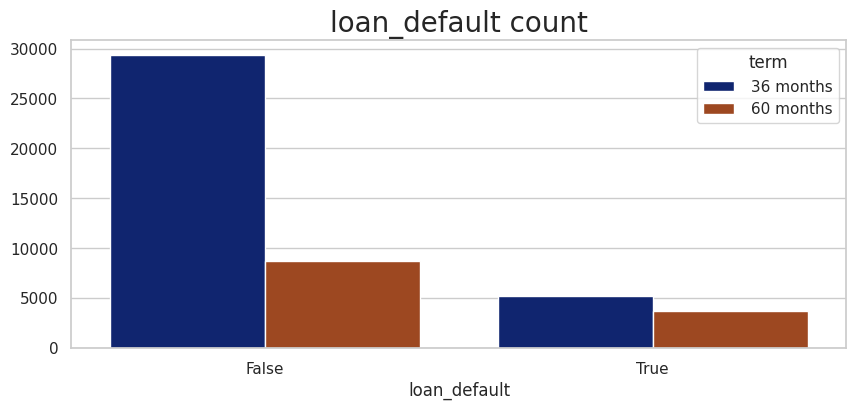

In [ ]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_default",hue="term",palette='dark')
ax.set(xlabel='loan_default', ylabel='')
ax.set_title('loan_default count', size=20)

Text(0.5, 1.0, 'loan_default count')

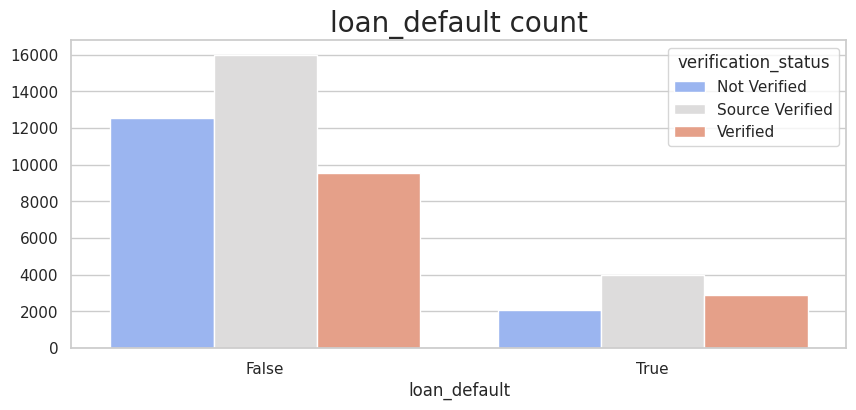

In [ ]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_default",hue="verification_status",palette='coolwarm')
ax.set(xlabel='loan_default', ylabel='')
ax.set_title('loan_default count', size=20)

In [ ]:
# Dividing our features into categorical and numerical
categorical=[feature for feature in df.columns if df[feature].dtype=='object']
numerical=[feature for feature in df.columns if feature not in categorical]

In [ ]:
print("Categorical columns:",categorical)
print("Numerical columns:",numerical)

Categorical columns: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'loan_status']
Numerical columns: ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_amnt', 'loan_default']


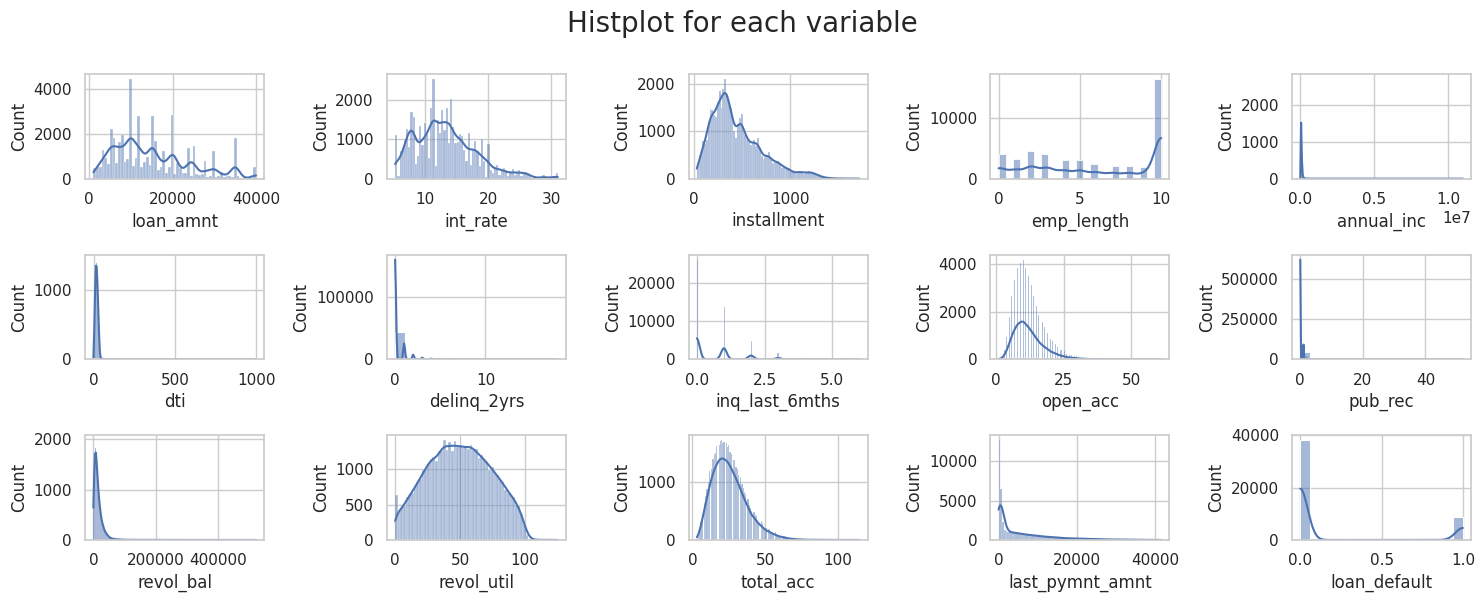

In [ ]:
# Histplot for each variable in numerical list
def histplot_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=df,column=numerical)
plt.tight_layout()

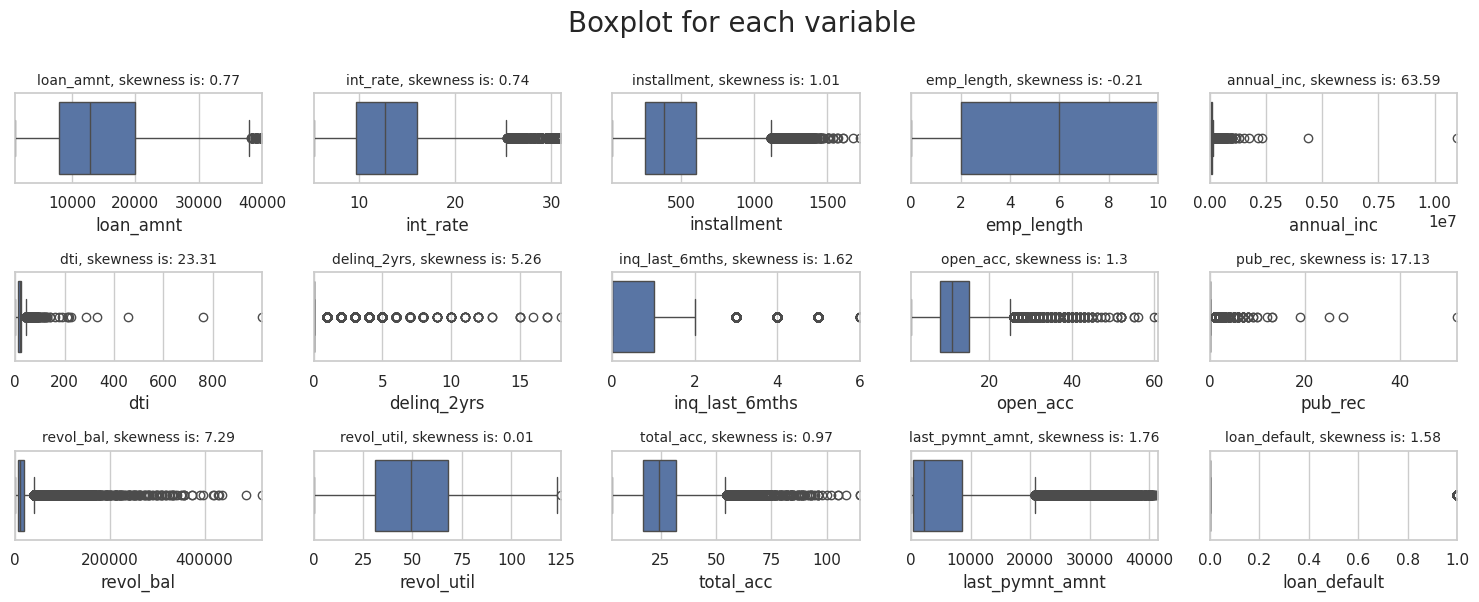

In [ ]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical)
plt.tight_layout()

In [ ]:
# Term column
print("Before:",df['term'].unique())
df['term'] = df['term'].map(lambda x: x.lstrip(' ').rstrip(' months'))
print("After:",df['term'].unique())
df['term']=df['term'].astype('int64')

Before: [' 36 months' ' 60 months']
After: ['36' '60']


In [ ]:
# Label Encoding
df['grade']= df['grade'].map({'A':0,'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})

df['sub_grade']= df['sub_grade'].map({'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4,
                                      'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9,
                                      'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14,
                                      'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
                                      'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24,
                                      'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
                                      'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34})

df['loan_status']= df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

df['loan_default']= df['loan_default'].map({'False':0, 'True':1})

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,24098
RENT,17993
OWN,4914
OTHER,39


In [ ]:
df['verification_status'].value_counts()

,count
verification_status,
Source Verified,19990
Not Verified,14640
Verified,12414


In [ ]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,27035
credit_card,10480
home_improvement,3197
other,2814
major_purchase,1081
medical,511
small_business,502
car,429
vacation,330


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,loan_default
2,5000.0,36,10.49,162.49,1,7,10,MORTGAGE,55000.0,Not Verified,credit_card,7.22,0.0,0.0,7.0,1.0,6001.0,52.6,9.0,162.43,0,NaN
4,14000.0,60,13.59,322.79,2,11,10,MORTGAGE,48000.0,Source Verified,debt_consolidation,24.30,0.0,1.0,16.0,0.0,11894.0,27.1,23.0,11128.82,0,NaN
5,4000.0,36,11.49,131.89,1,9,10,RENT,46000.0,Verified,moving,11.56,0.0,0.0,4.0,1.0,3556.0,38.7,7.0,131.89,1,NaN
7,19500.0,36,17.27,697.86,3,16,2,RENT,99000.0,Not Verified,debt_consolidation,16.12,0.0,1.0,6.0,0.0,3959.0,82.5,19.0,4755.10,0,NaN
12,20000.0,36,10.56,650.62,1,7,10,RENT,86000.0,Source Verified,debt_consolidation,8.76,0.0,0.0,13.0,1.0,10368.0,32.6,37.0,650.62,1,NaN


In [ ]:
df.drop(['loan_default'],axis= 1, inplace=True)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
2,5000.0,36,10.49,162.49,1,7,10,MORTGAGE,55000.0,Not Verified,credit_card,7.22,0.0,0.0,7.0,1.0,6001.0,52.6,9.0,162.43,0
4,14000.0,60,13.59,322.79,2,11,10,MORTGAGE,48000.0,Source Verified,debt_consolidation,24.30,0.0,1.0,16.0,0.0,11894.0,27.1,23.0,11128.82,0
5,4000.0,36,11.49,131.89,1,9,10,RENT,46000.0,Verified,moving,11.56,0.0,0.0,4.0,1.0,3556.0,38.7,7.0,131.89,1
7,19500.0,36,17.27,697.86,3,16,2,RENT,99000.0,Not Verified,debt_consolidation,16.12,0.0,1.0,6.0,0.0,3959.0,82.5,19.0,4755.10,0
12,20000.0,36,10.56,650.62,1,7,10,RENT,86000.0,Source Verified,debt_consolidation,8.76,0.0,0.0,13.0,1.0,10368.0,32.6,37.0,650.62,1


In [ ]:
# One hot encoding
df=pd.get_dummies(data=df,columns=['home_ownership','verification_status','purpose'],dtype=int, drop_first=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
2,5000.0,36,10.49,162.49,1,7,10,55000.0,7.22,0.0,0.0,7.0,1.0,6001.0,52.6,9.0,162.43,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,14000.0,60,13.59,322.79,2,11,10,48000.0,24.30,0.0,1.0,16.0,0.0,11894.0,27.1,23.0,11128.82,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,4000.0,36,11.49,131.89,1,9,10,46000.0,11.56,0.0,0.0,4.0,1.0,3556.0,38.7,7.0,131.89,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7,19500.0,36,17.27,697.86,3,16,2,99000.0,16.12,0.0,1.0,6.0,0.0,3959.0,82.5,19.0,4755.10,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12,20000.0,36,10.56,650.62,1,7,10,86000.0,8.76,0.0,0.0,13.0,1.0,10368.0,32.6,37.0,650.62,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
## **Model Training**

In [ ]:
# Dividing our dataset into independent and dependent features
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [ ]:
# Splitting our dataset between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [ ]:
# MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,38104
1,8940


In [ ]:
print("Fully Paid:",df['loan_status'].value_counts()[0]/len(df['loan_status'])*100)
print("Charged Off:",df['loan_status'].value_counts()[1]/len(df['loan_status'])*100)

Fully Paid: 80.9965139018791
Charged Off: 19.00348609812091


Observation
Data imbalance observed in Target variable. Fully Paid: 80.64490758946127 & Charged Off: 19.355092410538735

Hence handling thr inbalance dataset is required

Handling Imbalanced Dataset

# **Undersampling**


In [ ]:
ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 28549, 1: 6734})
The number of classes after fit Counter({0: 6734, 1: 6734})


Model 1 : 'Random Forest Mode' with Undersampled data

In [ ]:
model1=RandomForestClassifier()
model1.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [ ]:
y_pred=model1.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[7164 2391]
 [ 329 1877]]


Accuracy Score: 
 0.7687271490519514


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      9555
           1       0.44      0.85      0.58      2206

    accuracy                           0.77     11761
   macro avg       0.70      0.80      0.71     11761
weighted avg       0.86      0.77      0.79     11761



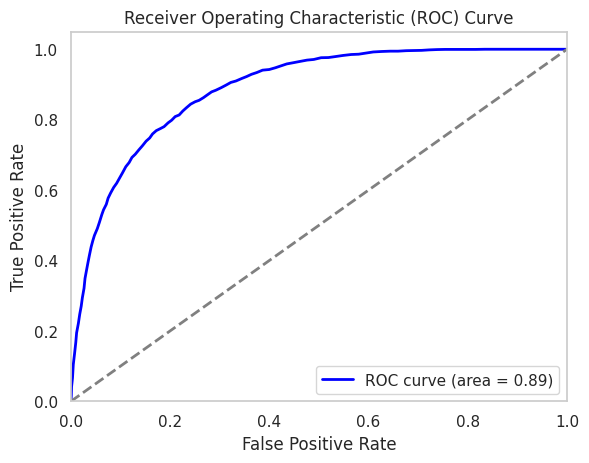

ROC AUC Score: 0.89


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Compute predicted probabilities (for the positive class)
y_pred_prob = model1.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random prediction)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Additional stats
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}')

# **Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 28549, 1: 6734})
The number of classes after fit Counter({0: 28549, 1: 28549})


In [ ]:
y_train_os.value_counts()

,count
loan_status,
0,28549
1,28549


Model 2 : 'Random Forest Mode' with Oversampled data

In [ ]:
model2=RandomForestClassifier()
model2.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [ ]:
y_pred=model2.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[8827  728]
 [ 721 1485]]


Accuracy Score: 
 0.8767961908001021


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      9555
           1       0.67      0.67      0.67      2206

    accuracy                           0.88     11761
   macro avg       0.80      0.80      0.80     11761
weighted avg       0.88      0.88      0.88     11761



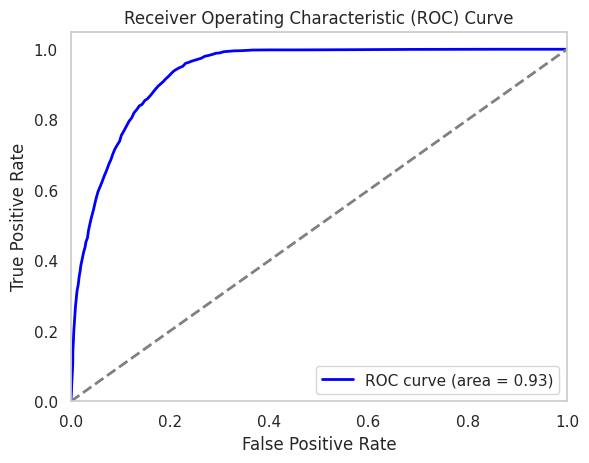

ROC AUC Score: 0.93


In [ ]:
# Compute predicted probabilities (for the positive class)
y_pred_prob = model2.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random prediction)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Additional stats
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}')

Combine over- and under-sampling using SMOTE and Tomek

In [ ]:
from imblearn.combine import SMOTETomek                    # For Both Undersampling & Oversampling

In [ ]:
smt=SMOTETomek()
X_train_smt,y_train_smt=smt.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

The number of classes before fit Counter({0: 28549, 1: 6734})
The number of classes after fit Counter({0: 28348, 1: 28348})


Model 3 : 'Random Forest Model' for both Undersampling & Oversampling data

In [ ]:
model3=RandomForestClassifier()
model3.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [ ]:
y_pred=model3.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[8725  830]
 [ 658 1548]]


Accuracy Score: 
 0.8734801462460675


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      9555
           1       0.65      0.70      0.68      2206

    accuracy                           0.87     11761
   macro avg       0.79      0.81      0.80     11761
weighted avg       0.88      0.87      0.88     11761



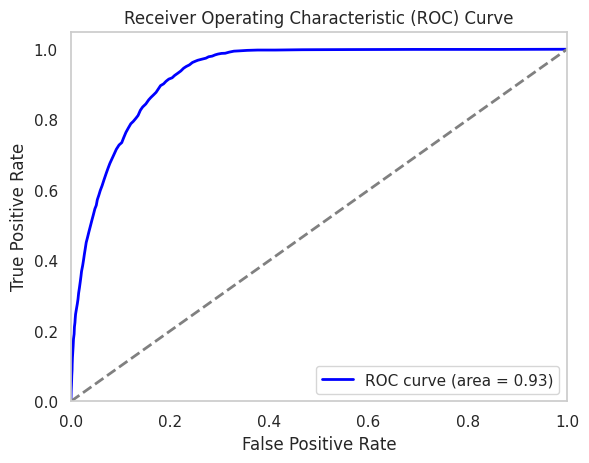

ROC AUC Score: 0.93


In [ ]:
# Compute predicted probabilities (for the positive class)
y_pred_prob = model3.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random prediction)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Additional stats
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}')

Hyperparameter Tuning with Keras Tuner

In [ ]:
# Define the build_model function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(                   # The tuner uses the build_model function defined earlier as its model-building function,
    build_model,                        # and searches for the best hyperparameters based on validation accuracy.
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2)
tuner.search(X_train_smt, y_train_smt, epochs=10, validation_data=(X_test, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]                # Storing my best hyperparameters in the best_hps variable.

Trial 3 Complete [00h 06m 33s]
val_accuracy: 0.8417226374149323

Best val_accuracy So Far: 0.8417226374149323
Total elapsed time: 00h 24m 00s


In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [ ]:
# Define the create_model function to build a Keras model with the optimal hyperparameters
def create_model(num_layers, num_nodes, activation):
    model = keras.Sequential()
    for i in range(num_layers):
        if i==0:                                                           # checks whether the current layer is the first layer of the model.
            model.add(layers.Dense(num_nodes[i], input_dim=X_train.shape[1]))
            model.add(layers.Activation(activation))
            model.add(layers.Dropout(0.3))
        else:
            model.add(layers.Dense(num_nodes[i]))
            model.add(layers.Activation(activation))
            model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Generate a list of integers for the number of nodes in each layer
num_nodes = [best_hps.get('units_' + str(i)) for i in range(best_hps.get('num_layers'))]

model = KerasClassifier(
    build_fn=create_model,
    num_layers=best_hps.get('num_layers'),
    num_nodes=num_nodes,
    activation='relu'
)

In [ ]:
# Fit the Keras Classifier model with the optimal hyperparameters
Challenger_model= model.fit(X_train_smt, y_train_smt, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7341 - loss: 0.4965 - val_accuracy: 0.8102 - val_loss: 0.3126
Epoch 2/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.8386 - loss: 0.3586 - val_accuracy: 0.7730 - val_loss: 0.3522
Epoch 3/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8481 - loss: 0.3452 - val_accuracy: 0.7811 - val_loss: 0.4027
Epoch 4/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8515 - loss: 0.3361 - val_accuracy: 0.7788 - val_loss: 0.3392
Epoch 5/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8527 - loss: 0.3302 - val_accuracy: 0.8291 - val_loss: 0.2973
Epoch 6/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8548 - loss: 0.3307 - val_accuracy: 0.8110 - val_loss: 0.3279
Epoch 7/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.8608 - loss: 0.3234 - val_accuracy: 0.8061 - val_loss: 0.3457
Epoch 8/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8611 -

In [ ]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)

368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[7468 2087]
 [ 157 2049]]


Accuracy Score: 
 0.8091998979678598


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      9555
           1       0.50      0.93      0.65      2206

    accuracy                           0.81     11761
   macro avg       0.74      0.86      0.76     11761
weighted avg       0.89      0.81      0.83     11761



368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


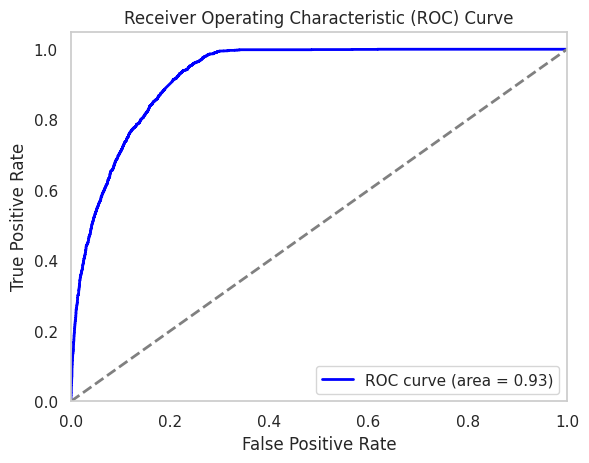

ROC AUC Score: 0.93


In [ ]:
# Compute predicted probabilities (for the positive class)
y_pred_prob = Challenger_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random prediction)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Additional stats
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}')

### **Conclusion Remarks**
**Model 1:** 'Random Forest Mode' with Undersampled data The model gave an Accuracy Score: 0.7687  i.e. Accuracy of the model is 76%

Precision % was 96% for Class 0 (Loans paid back) i.e. model was able to correctly predict it 96% of the times. F1 score % was 84% for Class 0 (Loans paid back) i.e. model was able to correctly predict it 84% of the times. Precision % was 44% for Class 1 (Loans not paid back) i.e. model was able to correctly predict it 44% of the times. F1 score % was 58% for Class 1 (Loans not paid back) i.e. model was able to correctly predict it 58% of the times.

**Model 2:** 'Random Forest Mode' with Oversampled data The model gave an Accuracy Score: 0.8767  i.e. Accuracy of the model is 87%

Precision % was 92% for Class 0 (Loans paid back) i.e. model was able to correctly predict it 92% of the times. F1 score % was 92% for Class 0 (Loans paid back) i.e. model was able to correctly predict it 92% of the times. Precision % was 67% for Class 1 (Loans not paid back) i.e. model was able to correctly predict it 67% of the times. F1 score % was 67% for Class 1 (Loans not paid back) i.e. model was able to correctly predict it 67% of the times.

**Model 3**: 'Random Forest Mode' with Under & Oversampled data The model gave an Accuracy Score: 0.8734 i.e. Accuracy of the model is 87%

Precision % was 93% for Class 0 (Loans paid back) i.e. model was able to correctly predict it 93% of the times. F1 score % was 92% for Class 0 (Loans paid back) i.e. model was able to correctly predict it 92% of the times. Precision % was 65% for Class 1 (Loans not paid back) i.e. model was able to correctly predict it 65% of the times. F1 score % was 68% for Class 1 (Loans not paid back) i.e. model was able to correctly predict it 68% of the times.

**Challenger Model:** 'Keras Classifier model' with with the optimal hyperparameters gave an Accuracy Score: 0.8091 i.e. Accuracy of the model is 80%

Precision % was 98% for Class 0 (Loans paid back) i.e. model was able to correctly predict it 98% of the times. F1 score % was 87% for Class 0 (Loans paid back) i.e. model was able to correctly predict it 87% of the times. Precision % was 50% for Class 1 (Loans not paid back) i.e. model was able to correctly predict it 50% of the times. F1 score % was 65% for Class 1 (Loans not paid back) i.e. model was able to correctly predict it 65% of the times.

This means that the model is better at predicting loans that will be paid back than loans that will not be paid back.

